<a href="https://colab.research.google.com/github/sethkipsangmutuba/Summer-School-Mathematics-of-Artificial-Intellingence/blob/Deep-Learning/Mathematics_of_AI_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

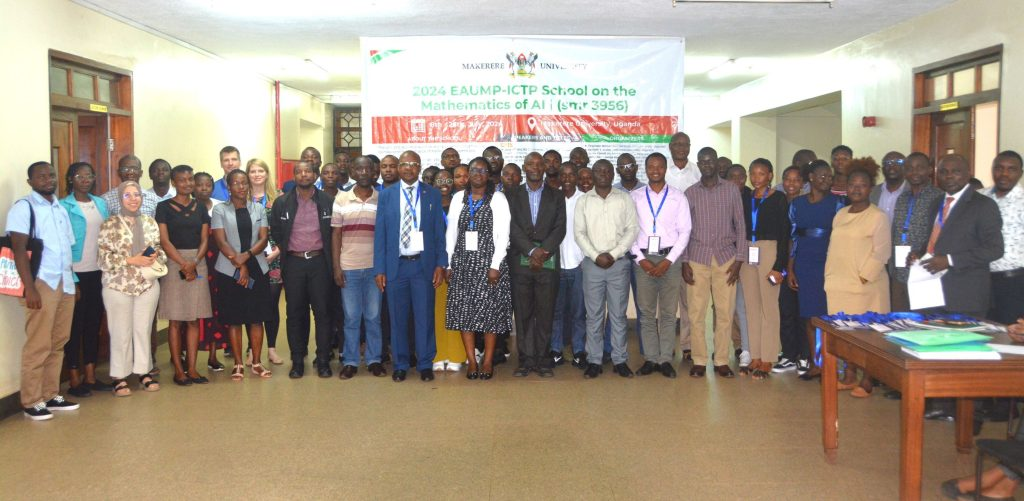

# Q1

In [ ]:
import numpy as np

# Number of actions (arms) and rounds
K = 5  # Number of arms
T = 1000  # Number of rounds

# True means for each arm (unknown to the learner)
true_means = np.random.rand(K)

# Optimal mean
mu_star = np.max(true_means)

# Function to simulate the rewards for a given action
def get_reward(action):
    return np.random.binomial(1, true_means[action])

# Simulating the bandit environment
actions = np.random.choice(K, T)  # Random actions chosen by the learner
rewards = np.array([get_reward(action) for action in actions])

# Compute the first definition of regret
expected_total_reward = np.sum(true_means[actions])
regret_def1 = T * mu_star - expected_total_reward

# Compute the second definition of regret
action_counts = np.array([np.sum(actions == a) for a in range(K)])
regret_def2 = np.sum((mu_star - true_means) * action_counts)

print(f"Regret (Definition 1): {regret_def1}")
print(f"Regret (Definition 2): {regret_def2}")

# Check if both definitions give the same result
assert np.isclose(regret_def1, regret_def2), "The regrets calculated by the two definitions do not match."
print("Both regret definitions match.")


Regret (Definition 1): 275.09724454898253
Regret (Definition 2): 275.0972445489825
Both regret definitions match.


# Q1 Visualization

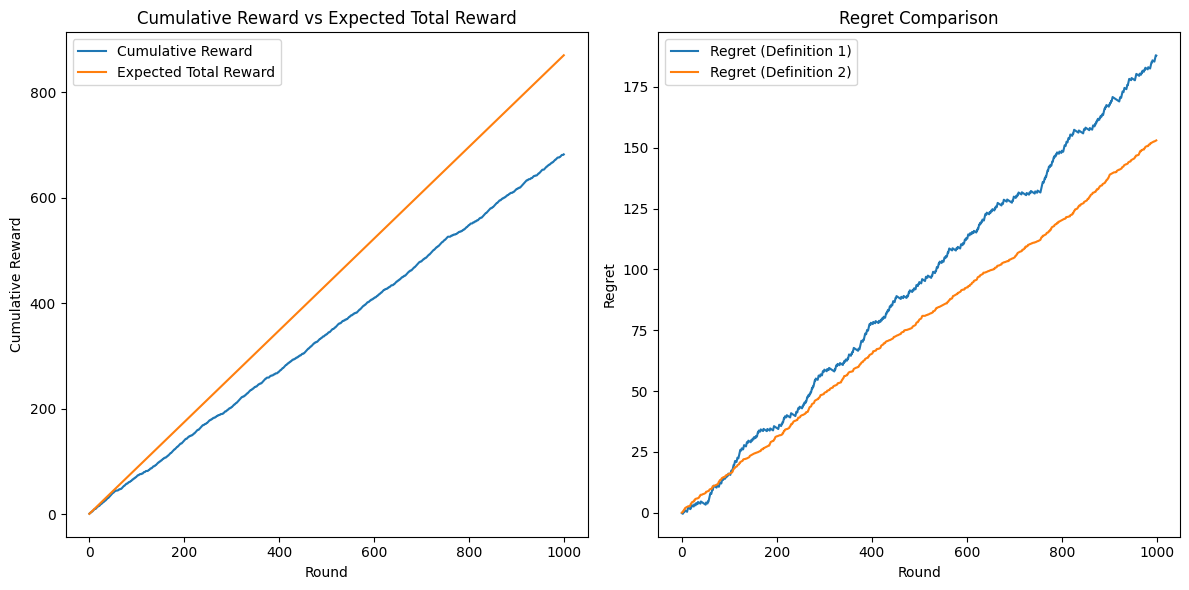

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions (arms) and rounds
K = 5  # Number of arms
T = 1000  # Number of rounds

# True means for each arm (unknown to the learner)
true_means = np.random.rand(K)

# Optimal mean
mu_star = np.max(true_means)

# Function to simulate the rewards for a given action
def get_reward(action):
    return np.random.binomial(1, true_means[action])

# Simulating the bandit environment
actions = np.random.choice(K, T)  # Random actions chosen by the learner
rewards = np.array([get_reward(action) for action in actions])

# Compute the first definition of regret
cumulative_rewards = np.cumsum(rewards)
regret_def1 = np.arange(1, T+1) * mu_star - cumulative_rewards

# Compute the second definition of regret
action_counts = np.zeros((T, K))
for t in range(T):
    for a in range(K):
        action_counts[t, a] = np.sum(actions[:t+1] == a)

# Action gaps
action_gaps = mu_star - true_means

# Regret definition 2 calculation
regret_def2 = np.zeros(T)
for t in range(T):
    regret_def2[t] = np.sum(action_gaps * action_counts[t])

# Visualization
plt.figure(figsize=(12, 6))

# Plot cumulative rewards
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards, label='Cumulative Reward')
plt.plot(np.arange(1, T+1) * mu_star, label='Expected Total Reward')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Expected Total Reward')
plt.legend()

# Plot regrets
plt.subplot(1, 2, 2)
plt.plot(regret_def1, label='Regret (Definition 1)')
plt.plot(regret_def2, label='Regret (Definition 2)')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret Comparison')
plt.legend()

plt.tight_layout()
plt.show()




#Exercise 2: Multi-Armed Bandit with Bernoulli Arms
##Step 1: Draw random samples from all arms for T = 1000 rounds and store them in a matrix.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms and rounds
K = 6  # Number of arms
T = 1000  # Number of rounds

# True means for each arm
true_means = np.array([0.3, 0.5, 0.4, 0.45, 0.3, 0.35])

# Function to simulate the rewards for a given action
def get_reward(action):
    return np.random.binomial(1, true_means[action])

# Initialize matrix to store the samples
samples = np.zeros((T, K))

# Draw random samples from all arms
for t in range(T):
    for k in range(K):
        samples[t, k] = get_reward(k)

# Display first 10 samples for illustration
print("First 10 samples for each arm:")
print(samples[:10, :])


First 10 samples for each arm:
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


## Step 2: Compute the empirical mean for each arm after 10 rounds, after 100 rounds, and after 1000 rounds.

In [ ]:
# Compute empirical means
empirical_means_10 = np.mean(samples[:10, :], axis=0)
empirical_means_100 = np.mean(samples[:100, :], axis=0)
empirical_means_1000 = np.mean(samples[:1000, :], axis=0)

print("Empirical means after 10 rounds:", empirical_means_10)
print("Empirical means after 100 rounds:", empirical_means_100)
print("Empirical means after 1000 rounds:", empirical_means_1000)


Empirical means after 10 rounds: [0.2 0.3 0.3 0.6 0.3 0.5]
Empirical means after 100 rounds: [0.23 0.49 0.41 0.51 0.2  0.36]
Empirical means after 1000 rounds: [0.294 0.527 0.406 0.481 0.292 0.353]


## Step 3: Compare these empirical values to the true mean values, and compute the deviations from the mean for the different sample sizes.

Deviations from true means after 10 rounds: [0.1  0.2  0.1  0.15 0.   0.15]
Deviations from true means after 100 rounds: [0.07 0.01 0.01 0.06 0.1  0.01]
Deviations from true means after 1000 rounds: [0.006 0.027 0.006 0.031 0.008 0.003]


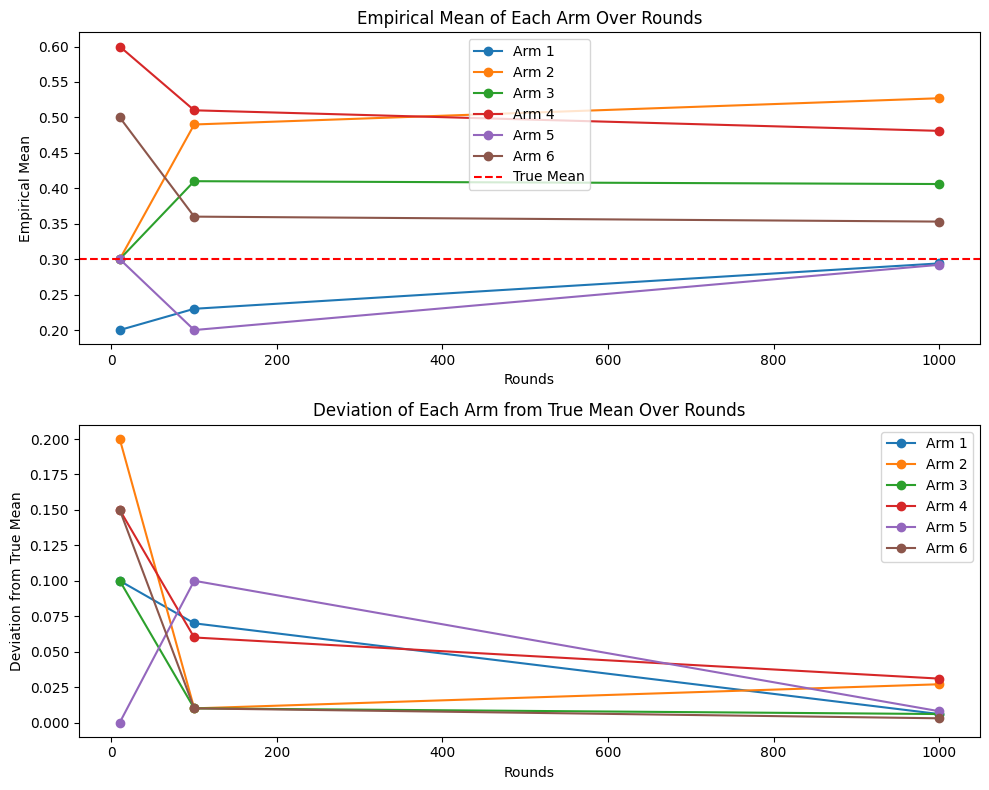

In [ ]:
# Calculate deviations from the true means
deviation_10 = np.abs(empirical_means_10 - true_means)
deviation_100 = np.abs(empirical_means_100 - true_means)
deviation_1000 = np.abs(empirical_means_1000 - true_means)

print("Deviations from true means after 10 rounds:", deviation_10)
print("Deviations from true means after 100 rounds:", deviation_100)
print("Deviations from true means after 1000 rounds:", deviation_1000)

# Visualization of empirical means and deviations
rounds = [10, 100, 1000]
empirical_means = [empirical_means_10, empirical_means_100, empirical_means_1000]
deviations = [deviation_10, deviation_100, deviation_1000]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot empirical means
for i in range(K):
    ax[0].plot(rounds, [empirical_means[j][i] for j in range(3)], marker='o', label=f'Arm {i+1}')
ax[0].axhline(y=true_means[0], color='r', linestyle='--', label='True Mean')
ax[0].set_xlabel('Rounds')
ax[0].set_ylabel('Empirical Mean')
ax[0].set_title('Empirical Mean of Each Arm Over Rounds')
ax[0].legend()

# Plot deviations from true means
for i in range(K):
    ax[1].plot(rounds, [deviations[j][i] for j in range(3)], marker='o', label=f'Arm {i+1}')
ax[1].set_xlabel('Rounds')
ax[1].set_ylabel('Deviation from True Mean')
ax[1].set_title('Deviation of Each Arm from True Mean Over Rounds')
ax[1].legend()

plt.tight_layout()
plt.show()


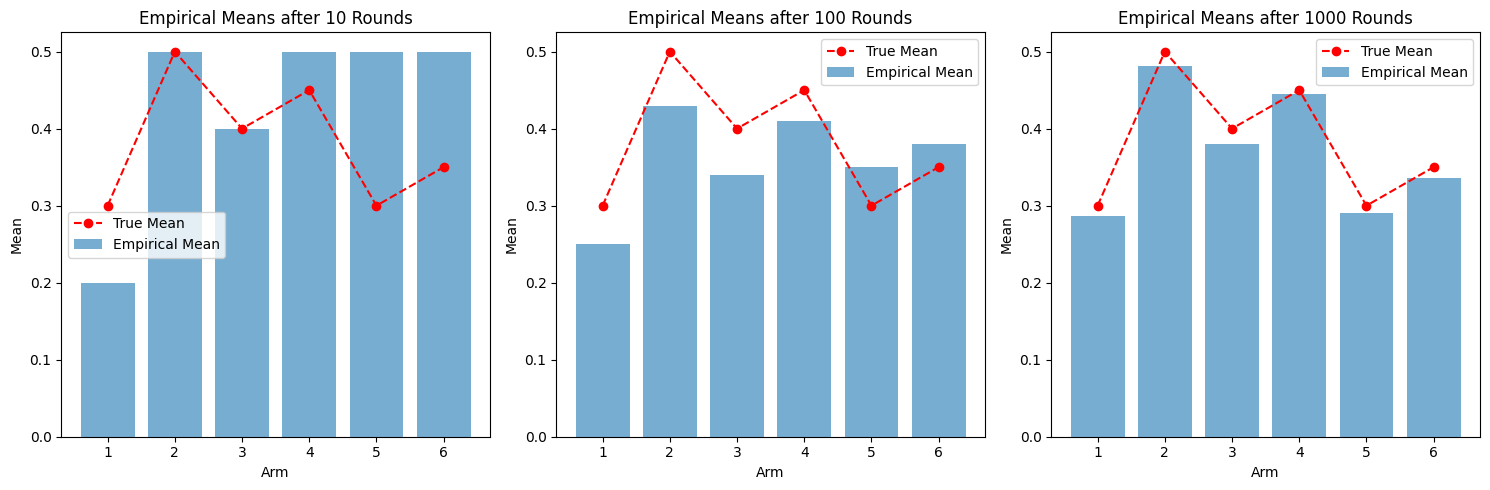

Deviations from true means after 10 rounds: [0.1  0.   0.   0.05 0.2  0.15]
Deviations from true means after 100 rounds: [0.05 0.07 0.06 0.04 0.05 0.03]
Deviations from true means after 1000 rounds: [0.014 0.019 0.02  0.005 0.009 0.014]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions (arms) and rounds
K = 6  # Number of arms
T = 1000  # Number of rounds

# True means for each arm
true_means = np.array([0.3, 0.5, 0.4, 0.45, 0.3, 0.35])

# Function to simulate the rewards for a given action
def get_reward(action, true_means):
    return np.random.binomial(1, true_means[action])

# Simulating the bandit environment and storing the rewards in a matrix
rewards_matrix = np.zeros((K, T))
for t in range(T):
    for k in range(K):
        rewards_matrix[k, t] = get_reward(k, true_means)

# Compute empirical means after 10, 100, and 1000 rounds
empirical_means_10 = np.mean(rewards_matrix[:, :10], axis=1)
empirical_means_100 = np.mean(rewards_matrix[:, :100], axis=1)
empirical_means_1000 = np.mean(rewards_matrix[:, :1000], axis=1)

# Compute deviations from the true means
deviations_10 = np.abs(empirical_means_10 - true_means)
deviations_100 = np.abs(empirical_means_100 - true_means)
deviations_1000 = np.abs(empirical_means_1000 - true_means)

# Visualization of empirical means vs true means
plt.figure(figsize=(15, 5))

# Empirical means after 10 rounds
plt.subplot(1, 3, 1)
plt.bar(range(1, K+1), empirical_means_10, alpha=0.6, label='Empirical Mean')
plt.plot(range(1, K+1), true_means, 'r--', marker='o', label='True Mean')
plt.xlabel('Arm')
plt.ylabel('Mean')
plt.title('Empirical Means after 10 Rounds')
plt.legend()

# Empirical means after 100 rounds
plt.subplot(1, 3, 2)
plt.bar(range(1, K+1), empirical_means_100, alpha=0.6, label='Empirical Mean')
plt.plot(range(1, K+1), true_means, 'r--', marker='o', label='True Mean')
plt.xlabel('Arm')
plt.ylabel('Mean')
plt.title('Empirical Means after 100 Rounds')
plt.legend()

# Empirical means after 1000 rounds
plt.subplot(1, 3, 3)
plt.bar(range(1, K+1), empirical_means_1000, alpha=0.6, label='Empirical Mean')
plt.plot(range(1, K+1), true_means, 'r--', marker='o', label='True Mean')
plt.xlabel('Arm')
plt.ylabel('Mean')
plt.title('Empirical Means after 1000 Rounds')
plt.legend()

plt.tight_layout()
plt.show()

# Print deviations
print(f"Deviations from true means after 10 rounds: {deviations_10}")
print(f"Deviations from true means after 100 rounds: {deviations_100}")
print(f"Deviations from true means after 1000 rounds: {deviations_1000}")


# Q3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Number of rounds
T = 1000

# Function to simulate rewards for a given action
def get_reward(action, true_means):
    return np.random.binomial(1, true_means[action])

# Uniform Exploration
def uniform_exploration(true_means, T):
    K = len(true_means)
    actions = np.random.choice(K, T)
    rewards = np.array([get_reward(action, true_means) for action in actions])
    empirical_regret = T * np.max(true_means) - np.sum(rewards)
    return empirical_regret

# Follow The Leader
def follow_the_leader(true_means, T):
    K = len(true_means)
    rewards = np.zeros(T)
    actions = np.zeros(T, dtype=int)
    empirical_means = np.zeros(K)
    counts = np.zeros(K)

    for t in range(T):
        if t < K:  # First K rounds, choose each arm once
            action = t
        else:  # Follow the leader
            action = np.argmax(empirical_means)

        reward = get_reward(action, true_means)
        rewards[t] = reward
        actions[t] = action
        counts[action] += 1
        empirical_means[action] = (empirical_means[action] * (counts[action] - 1) + reward) / counts[action]

    empirical_regret = T * np.max(true_means) - np.sum(rewards)
    return empirical_regret

# Explore-Then-Commit
def explore_then_commit(true_means, T, explore_rounds):
    K = len(true_means)
    rewards = np.zeros(T)
    empirical_means = np.zeros(K)
    counts = np.zeros(K)

    # Explore phase
    for t in range(explore_rounds):
        action = t % K
        reward = get_reward(action, true_means)
        rewards[t] = reward
        counts[action] += 1
        empirical_means[action] = (empirical_means[action] * (counts[action] - 1) + reward) / counts[action]

    # Commit phase
    best_action = np.argmax(empirical_means)
    for t in range(explore_rounds, T):
        reward = get_reward(best_action, true_means)
        rewards[t] = reward

    empirical_regret = T * np.max(true_means) - np.sum(rewards)
    return empirical_regret

# Simulate the algorithms over multiple runs
def simulate_algorithms(K, T, n_runs, explore_rounds):
    regrets_uniform = []
    regrets_ftl = []
    regrets_etc = []

    for run in range(n_runs):
        true_means = np.random.rand(K)
        regret_uniform = uniform_exploration(true_means, T)
        regret_ftl = follow_the_leader(true_means, T)
        regret_etc = explore_then_commit(true_means, T, explore_rounds)

        regrets_uniform.append(regret_uniform)
        regrets_ftl.append(regret_ftl)
        regrets_etc.append(regret_etc)

    return np.mean(regrets_uniform), np.mean(regrets_ftl), np.mean(regrets_etc)

# Parameters
K = 2
T = 1000
n_runs = 50
explore_rounds = 100

# Simulate
mean_regret_uniform, mean_regret_ftl, mean_regret_etc = simulate_algorithms(K, T, n_runs, explore_rounds)

print(f"Average Regret (Uniform Exploration): {mean_regret_uniform}")
print(f"Average Regret (Follow The Leader): {mean_regret_ftl}")
print(f"Average Regret (Explore-Then-Commit): {mean_regret_etc}")


Average Regret (Uniform Exploration): 177.63326799953506
Average Regret (Follow The Leader): 31.073267999535037
Average Regret (Explore-Then-Commit): 23.33326799953504


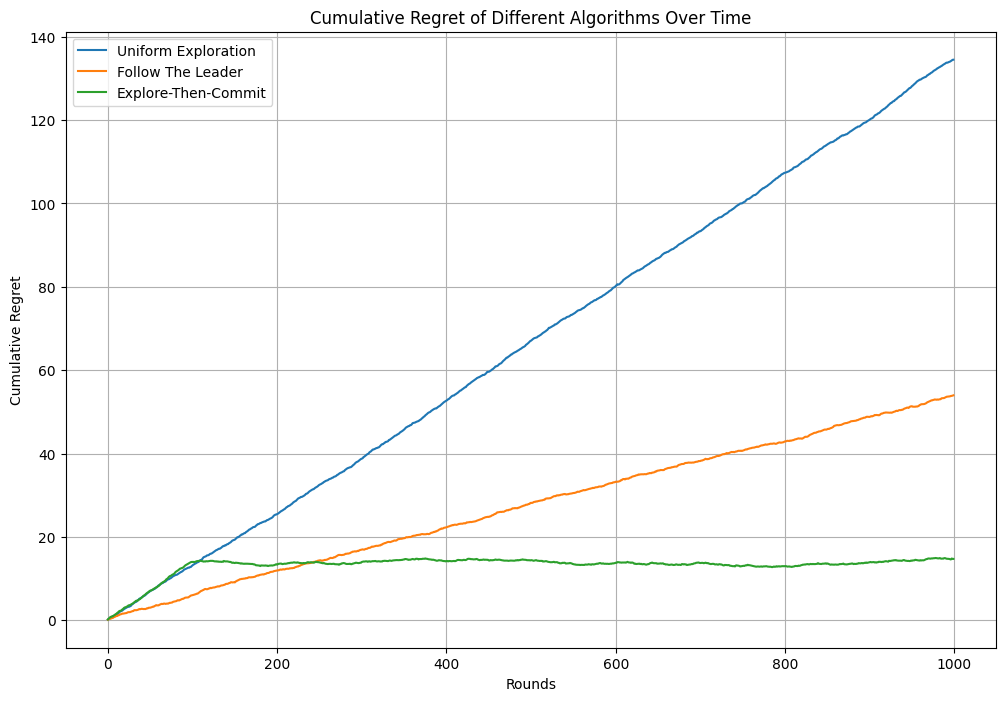

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of rounds
T = 1000

# Function to simulate rewards for a given action
def get_reward(action, true_means):
    return np.random.binomial(1, true_means[action])

# Uniform Exploration
def uniform_exploration(true_means, T):
    K = len(true_means)
    actions = np.random.choice(K, T)
    rewards = np.array([get_reward(action, true_means) for action in actions])
    cumulative_rewards = np.cumsum(rewards)
    optimal_cumulative_rewards = np.arange(1, T+1) * np.max(true_means)
    cumulative_regret = optimal_cumulative_rewards - cumulative_rewards
    return cumulative_regret

# Follow The Leader
def follow_the_leader(true_means, T):
    K = len(true_means)
    rewards = np.zeros(T)
    actions = np.zeros(T, dtype=int)
    empirical_means = np.zeros(K)
    counts = np.zeros(K)

    for t in range(T):
        if t < K:  # First K rounds, choose each arm once
            action = t
        else:  # Follow the leader
            action = np.argmax(empirical_means)

        reward = get_reward(action, true_means)
        rewards[t] = reward
        actions[t] = action
        counts[action] += 1
        empirical_means[action] = (empirical_means[action] * (counts[action] - 1) + reward) / counts[action]

    cumulative_rewards = np.cumsum(rewards)
    optimal_cumulative_rewards = np.arange(1, T+1) * np.max(true_means)
    cumulative_regret = optimal_cumulative_rewards - cumulative_rewards
    return cumulative_regret

# Explore-Then-Commit
def explore_then_commit(true_means, T, explore_rounds):
    K = len(true_means)
    rewards = np.zeros(T)
    empirical_means = np.zeros(K)
    counts = np.zeros(K)

    # Explore phase
    for t in range(explore_rounds):
        action = t % K
        reward = get_reward(action, true_means)
        rewards[t] = reward
        counts[action] += 1
        empirical_means[action] = (empirical_means[action] * (counts[action] - 1) + reward) / counts[action]

    # Commit phase
    best_action = np.argmax(empirical_means)
    for t in range(explore_rounds, T):
        reward = get_reward(best_action, true_means)
        rewards[t] = reward

    cumulative_rewards = np.cumsum(rewards)
    optimal_cumulative_rewards = np.arange(1, T+1) * np.max(true_means)
    cumulative_regret = optimal_cumulative_rewards - cumulative_rewards
    return cumulative_regret

# Simulate the algorithms over multiple runs
def simulate_algorithms(K, T, n_runs, explore_rounds):
    regrets_uniform = []
    regrets_ftl = []
    regrets_etc = []

    for run in range(n_runs):
        true_means = np.random.rand(K)
        regret_uniform = uniform_exploration(true_means, T)
        regret_ftl = follow_the_leader(true_means, T)
        regret_etc = explore_then_commit(true_means, T, explore_rounds)

        regrets_uniform.append(regret_uniform)
        regrets_ftl.append(regret_ftl)
        regrets_etc.append(regret_etc)

    mean_regret_uniform = np.mean(regrets_uniform, axis=0)
    mean_regret_ftl = np.mean(regrets_ftl, axis=0)
    mean_regret_etc = np.mean(regrets_etc, axis=0)

    return mean_regret_uniform, mean_regret_ftl, mean_regret_etc

# Parameters
K = 2
T = 1000
n_runs = 50
explore_rounds = 100

# Simulate
mean_regret_uniform, mean_regret_ftl, mean_regret_etc = simulate_algorithms(K, T, n_runs, explore_rounds)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(mean_regret_uniform, label='Uniform Exploration')
plt.plot(mean_regret_ftl, label='Follow The Leader')
plt.plot(mean_regret_etc, label='Explore-Then-Commit')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret of Different Algorithms Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Q4

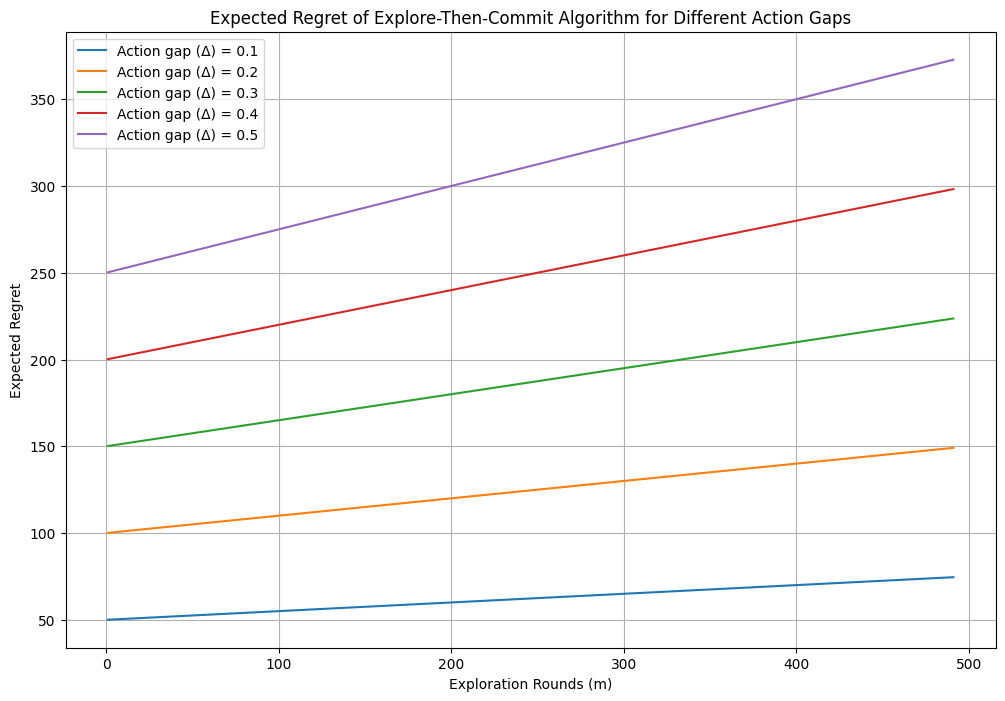

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate expected regret for Explore-Then-Commit algorithm
def expected_regret_ETC(T, m, delta):
    return delta * (m + (T - m) / 2)

# Parameters
T = 1000  # Total number of rounds
m_values = np.arange(1, T//2, 10)  # Different values of exploration rounds
delta_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Different values of action gaps

# Plotting the expected regret for different delta values
plt.figure(figsize=(12, 8))

for delta in delta_values:
    regrets = [expected_regret_ETC(T, m, delta) for m in m_values]
    plt.plot(m_values, regrets, label=f'Action gap (Δ) = {delta}')

plt.xlabel('Exploration Rounds (m)')
plt.ylabel('Expected Regret')
plt.title('Expected Regret of Explore-Then-Commit Algorithm for Different Action Gaps')
plt.legend()
plt.grid(True)
plt.show()


# Q5

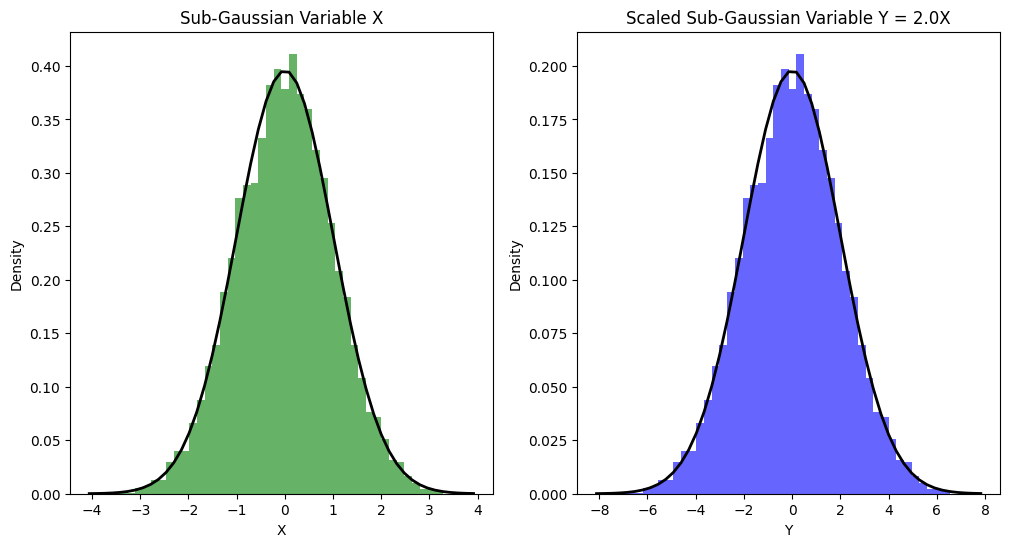

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate a sub-Gaussian random variable (Gaussian with zero mean and variance sigma^2)
sigma = 1.0
n_samples = 10000
X = np.random.normal(0, sigma, n_samples)

# Scale the variable
c = 2.0
Y = c * X

# Plot the distributions
plt.figure(figsize=(12, 6))

# Histogram and density line for X
plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(X, bins=50, density=True, alpha=0.6, color='g')
mu, std = norm.fit(X)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'k', linewidth=2)
plt.title('Sub-Gaussian Variable X')
plt.xlabel('X')
plt.ylabel('Density')

# Histogram and density line for Y
plt.subplot(1, 2, 2)
count, bins, ignored = plt.hist(Y, bins=50, density=True, alpha=0.6, color='b')
mu, std = norm.fit(Y)
p = norm.pdf(bins, mu, std)
plt.plot(bins, p, 'k', linewidth=2)
plt.title(f'Scaled Sub-Gaussian Variable Y = {c}X')
plt.xlabel('Y')
plt.ylabel('Density')

plt.show()
